In [4]:
from tqdm import tqdm_notebook as tqdm

# Sampling and integration in high dimensions

#### Definitions : relation between volumes in dimension d

![sampling](figs/qfAS7NlCEeWv6g6eMxXZ9Q_a0b869614a70e04905d55eadcca4fd06_DM4_table.png)


### Compute $Q(d)=\frac{V_{sph}(d)}{V_{sph}(d-1)}$ and $V_{sph}(d)$ using MC Markov chain sampling

#### Q(3)

In [1]:
import random

x, y = 0.0, 0.0
delta = 0.1
n_trials = 4000000
n_hits = 0
for i in range(n_trials):
    # random walk in x,y
    del_x, del_y = random.uniform(-delta, delta), random.uniform(-delta, delta)
    # update x,y if inside a disk
    if (x + del_x)**2 + (y + del_y)**2 < 1.0:
        x, y = x + del_x, y + del_y
    # else x,y not modified, thus still in the disk
    
    # sample z-coordinate
    z = random.uniform(-1, 1)
    # increment n_hits if (x,y,z) in the sphere
    if x**2 + y**2 + z**2 < 1.0: n_hits += 1
    # else (x,y,z) is inside the cylinder generated by the (x,y) disk
    # but outside the sphere because z is too high (or too low)
    # => n_hits/n_trials = V_cyl/V_sph 
    # since Q = 2*V_cyl/V_sph, then <Q> = 2.0 * n_hits / float(n_trials)
    
# difference between Q(3) = 4/3 and  2.0 * n_hits / float(n_trials)
print ("Q(3) = 4/3 = 1.333...", "| estimated using Markov MC = ", 2.0 * n_hits / float(n_trials), "| difference = ", 4/3 - 2.0 * n_hits / float(n_trials))


Q(3) = 4/3 = 1.333... | estimated using Markov MC =  1.3294485 | difference =  0.0038848333333332263


In [2]:
n_trials, n_hits

(4000000, 2658897)

#### Q(4)

In [6]:
import math

x, y, z = 0.0, 0.0, 0.0
delta = 0.1
n_trials = 400000
n_hits = 0
for i in tqdm(range(n_trials)):
    del_x, del_y, del_z = random.uniform(-delta, delta), random.uniform(-delta, delta), random.uniform(-delta, delta)
    # update x,y,z if on a sphere
    if (x + del_x)**2 + (y + del_y)**2 + (z + del_z)**2 < 1.0:
        x, y, z = x + del_x, y + del_y, z+ del_z
    alpha = random.uniform(-1, 1)
    # increment n_hits if (x,y,z, alpha) in the sphere    
    if x**2 + y**2 + z**2 + alpha **2 < 1.0: n_hits += 1
    # else (x,y,z, alpha) is inside the 4d-cylinder generated by the (x,y,z) sphere
    # but outside the sphere.
    # => n_hits/n_trials = V_cyl/V_sph => Q = 2*V_cyl/V_sph = 2.0 * n_hits / float(n_trials)

# difference between Q(3) = 4/3 and  2.0 * n_hits / float(n_trials)
print ("Q(4) = 3*pi/8 = 1.178...", "| estimated using Markov MC = ", 2.0 * n_hits / float(n_trials), 
       "| difference = ",  3*math.pi/8  - 2.0 * n_hits / float(n_trials))


<ipython-input-6-af3d246e2be6>:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(n_trials)):



Q(4) = 3*pi/8 = 1.178... | estimated using Markov MC =  1.171745 | difference =  0.006352245096172382


In [7]:
n_trials, n_hits

(400000, 234349)

### Sampling a d-dimensional unit sphere

Markov chain moves in one dimension at a time

In [17]:
import random, math

d = 4
def sample_sphere(d):
    x = [0] * d # initial config of d-dimensional vector
    old_radius_square = 0

    delta = 0.1
    n_trials = 1000000
    radii = [] # accepted radii

    for _ in tqdm(range(n_trials)):

        # modify one component
        k = random.randint(0, d - 1)
        x_old_k = x[k]
        # move it by at most delta    
        x_new_k = x_old_k + random.uniform(-delta, delta)
        # new radius after move
        new_radius_square = old_radius_square + x_new_k ** 2 - x_old_k ** 2
        # test if move is allowed
        if new_radius_square < 1.0:
            # update vector x
            x[k] = x_new_k
            old_radius_square = new_radius_square

        radii.append(math.sqrt(old_radius_square))
        
    return radii

**Check radii distribution for d = 4**

In [18]:
radii = sample_sphere(4)

<ipython-input-17-eb659c97e00a>:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for _ in tqdm(range(n_trials)):


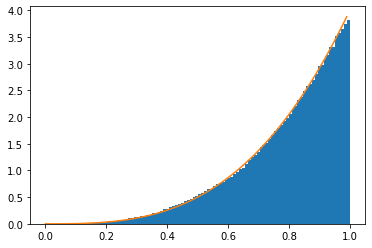

In [19]:
import pylab
pylab.hist(radii, bins=100, density=True)
# for d=4 only
pylab.plot([x/100 for x in range(100)], [4*(x/100)**3 for x in range(100)], label='analytical')
pylab.legend()

**Check radii distribution for d = 20**

<ipython-input-17-eb659c97e00a>:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for _ in tqdm(range(n_trials)):


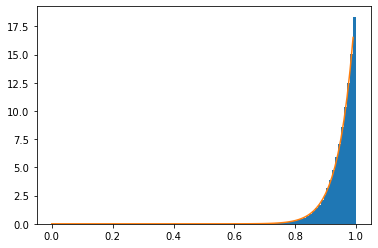

In [20]:
radii = sample_sphere(20)
pylab.hist(radii, bins=100, density=True)
# for d=20 only
pylab.plot([x/100 for x in range(100)], [20*(x/100)**19 for x in range(100)], label='analytical')
pylab.legend()

### Calculation of < Q > for any dimension

In [22]:
#from markov_pi compute volume of 3D sphere

import random

def Q_average(d):
    x = [0] * d # initial config of d-dimensional vector
    old_radius_square = 0

    delta = 0.1
    n_trials = 4000000
    n_hits = 0
    for i in range(n_trials):
        # modify one component in cylinder subspace
        k = random.randint(0, d - 2)
        x_old_k = x[k]
        # move it by at most delta    
        x_new_k = x_old_k + random.uniform(-delta, delta)
        # new radius after move
        new_radius_square = old_radius_square + x_new_k ** 2 - x_old_k ** 2
        # test if move is allowed
        if new_radius_square < 1.0:
            # update vector x
            x[k] = x_new_k
            # update radius in cylinder subspace
            old_radius_square = new_radius_square
        # else x,y not modified, thus still in the cylinder, so that n_trials are all in the cylinder

        # move along highest dimension
        z = random.uniform(-1, 1)
        # radius in sphere after moving along z
        radius_in_sphere_square = old_radius_square + z ** 2
        # increment n_hits if x is in the in the sphere
        if radius_in_sphere_square < 1.0: 
            n_hits += 1

        # => n_hits/n_trials = V_cyl/V_sph 
        # since Q = 2*V_cyl/V_sph, then <Q> = 2.0 * n_hits / float(n_trials)

    # difference between Q(3) = 4/3 and  2.0 * n_hits / float(n_trials)
    return 2.0 * n_hits / float(n_trials)
    

In [23]:
d = 4
print ("<Q(" + str(d) + ")> = ", Q_average(d))

d = 200
print ("<Q(" + str(d) + ")> = ", Q_average(d))


<Q(4)> =  1.1819935
<Q(200)> =  0.1769105


### Calculation of V(d)

In [149]:
import random

def Q_average(d):
    x = [0] * d # initial config of d-dimensional vector
    old_radius_square = 0

    delta = 0.1
    n_trials = 400000
    n_hits = 0
    for i in range(n_trials):
        # modify one component in cylinder subspace
        k = random.randint(0, d - 2)
        x_old_k = x[k]
        # move it by at most delta    
        x_new_k = x_old_k + random.uniform(-delta, delta)
        # new radius after move
        new_radius_square = old_radius_square + x_new_k ** 2 - x_old_k ** 2
        # test if move is allowed
        if new_radius_square < 1.0:
            # update vector x
            x[k] = x_new_k
            # update radius in cylinder subspace
            old_radius_square = new_radius_square
        # else x,y not modified, thus still in the cylinder, so that n_trials are all in the cylinder

        # move along highest dimension
        z = random.uniform(-1, 1)
        # radius in sphere after moving along z
        radius_in_sphere_square = old_radius_square + z ** 2
        # increment n_hits if x is in the in the sphere
        if radius_in_sphere_square < 1.0: 
            n_hits += 1

        # => n_hits/n_trials = V_cyl/V_sph 
        # since Q = 2*V_cyl/V_sph, then <Q> = 2.0 * n_hits / float(n_trials)

    # difference between Q(3) = 4/3 and  2.0 * n_hits / float(n_trials)
    return 2.0 * n_hits / float(n_trials)
    

#### V(200)

from $Q(d)=\frac{V_{sph}(d)}{V_{sph}(d-1)}$ , 
Iteratively compute $V(200) = V_{sph}(1)<Q(2)><Q(3)>...<Q(200)>$

In [150]:
V_sph = 2 # d=1
V_spheres = [V_sph]
d_max = 200
for d in tqdm(range(1, d_max)):
    Q_ave = Q_average(d+1)
    V_sph_new = Q_ave*V_sph
    V_sph = V_sph_new
    V_spheres.append(V_sph)
    print(" Q_ave("+ str(d+1) + ") = ", Q_ave, "V("+ str(d+1) + ") = ", V_sph_new)
    

<ipython-input-150-0e8b37c96835>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for d in tqdm(range(1, d_max)):


 Q_ave(2) =  1.568335 V(2) =  3.13667
 Q_ave(3) =  1.3423 V(3) =  4.210352141
 Q_ave(4) =  1.184685 V(4) =  4.987941026160586
 Q_ave(5) =  1.071405 V(5) =  5.344104955133583
 Q_ave(6) =  0.970465 V(6) =  5.186266815283712
 Q_ave(7) =  0.91814 V(7) =  4.761719013784587
 Q_ave(8) =  0.85918 V(8) =  4.091173742263442
 Q_ave(9) =  0.802665 V(9) =  3.2838419718338856
 Q_ave(10) =  0.777585 V(10) =  2.553466259668452
 Q_ave(11) =  0.74208 V(11) =  1.8948762419747647
 Q_ave(12) =  0.71019 V(12) =  1.345722158288058
 Q_ave(13) =  0.68049 V(13) =  0.9157504714934407
 Q_ave(14) =  0.65989 V(14) =  0.6042945786338065
 Q_ave(15) =  0.639195 V(15) =  0.38626207318983596
 Q_ave(16) =  0.610905 V(16) =  0.23596943182203675
 Q_ave(17) =  0.599665 V(17) =  0.14150260933356168
 Q_ave(18) =  0.586935 V(18) =  0.08305283400919403
 Q_ave(19) =  0.5615 V(19) =  0.046634166296162446
 Q_ave(20) =  0.553575 V(20) =  0.02581550860739813
 Q_ave(21) =  0.538645 V(21) =  0.013905394633831966
 Q_ave(22) =  0.53054 

 Q_ave(155) =  0.204875 V(155) =  3.8523462709305146e-76
 Q_ave(156) =  0.20051 V(156) =  7.724339507842775e-77
 Q_ave(157) =  0.201495 V(157) =  1.55641578913278e-77
 Q_ave(158) =  0.197715 V(158) =  3.077267477483876e-78
 Q_ave(159) =  0.20049 V(159) =  6.169613565607423e-79
 Q_ave(160) =  0.19652 V(160) =  1.2124524579131707e-79
 Q_ave(161) =  0.196505 V(161) =  2.382529702422276e-80
 Q_ave(162) =  0.199525 V(162) =  4.753742388758046e-81
 Q_ave(163) =  0.19598 V(163) =  9.316384333488019e-82
 Q_ave(164) =  0.19394 V(164) =  1.8068195776366664e-82
 Q_ave(165) =  0.194165 V(165) =  3.508211232918234e-83
 Q_ave(166) =  0.195185 V(166) =  6.847502094971454e-84
 Q_ave(167) =  0.19295 V(167) =  1.3212255292247423e-84
 Q_ave(168) =  0.192765 V(168) =  2.5468603914100744e-85
 Q_ave(169) =  0.19273 V(169) =  4.9085640323646366e-86
 Q_ave(170) =  0.19159 V(170) =  9.404317829607408e-87
 Q_ave(171) =  0.1926 V(171) =  1.8112716139823867e-87
 Q_ave(172) =  0.192155 V(172) =  3.480448969847855e

#### Compare with analytical formula

In [24]:
import math

def V_sph(dim):
    '''
    Analytical formula
    '''
    return math.pi ** (dim / 2.0) / math.gamma(dim / 2.0 + 1.0)

for d in range(0, 20):
    print (d, V_sph(d), V_sph(d)/V_sph(d-1) )

0 1.0 3.141592653589793
1 1.9999999999999998 1.9999999999999998
2 3.141592653589793 1.5707963267948968
3 4.1887902047863905 1.3333333333333333
4 4.934802200544679 1.1780972450961724
5 5.263789013914325 1.0666666666666669
6 5.167712780049969 0.9817477042468102
7 4.7247659703314016 0.9142857142857145
8 4.058712126416768 0.8590292412159589
9 3.2985089027387064 0.8126984126984127
10 2.550164039877345 0.7731263170943632
11 1.8841038793898994 0.7388167388167386
12 1.3352627688545893 0.7086991240031665
13 0.910628754783283 0.681984681984682
14 0.5992645293207919 0.65807775800294
15 0.38144328082330436 0.6365190365190365
16 0.23533063035889312 0.6169478981277563
17 0.14098110691713897 0.5990767402532108
18 0.08214588661112819 0.5826730148984366
19 0.046621601030088534 0.5675463855030419


In [25]:
d=200
print (d, V_sph(d), V_sph(d)/V_sph(d-1) )

200 5.5588328420278045e-109 0.17702396769643863


In [234]:
V_spheres_analytical = []
for d in range(1, d_max + 1, 9):
    V_spheres_analytical.append(V_sph(d))

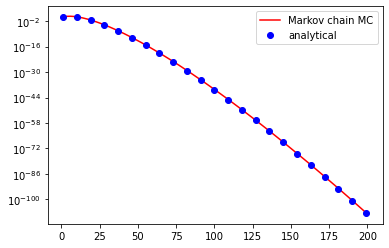

In [185]:
pylab.yscale('log')
pylab.plot(range(1, d_max+1), V_spheres, 'r', label='Markov chain MC')
pylab.plot(range(1, d_max+1, 9), V_spheres_analytical, 'bo', label='analytical')
pylab.legend()

#### estimate error (std error) as function of number of trials

In [28]:
import random
import numpy as np

def V_sph(dim):
    return math.pi ** (dim / 2.0) / math.gamma(dim / 2.0 + 1.0)

def Q_average(d, n_trials):
    x = [0] * d # initial config of d-dimensional vector
    old_radius_square = 0

    delta = 0.1
    n_hits = 0
    for i in range(n_trials):
        # modify one component in cylinder subspace
        k = random.randint(0, d - 2)
        x_old_k = x[k]
        # move it by at most delta    
        x_new_k = x_old_k + random.uniform(-delta, delta)
        # new radius after move
        new_radius_square = old_radius_square + x_new_k ** 2 - x_old_k ** 2
        # test if move is allowed
        if new_radius_square < 1.0:
            # update vector x
            x[k] = x_new_k
            # update radius in cylinder subspace
            old_radius_square = new_radius_square
        # else x,y not modified, thus still in the cylinder, so that n_trials are all in the cylinder

        # move along highest dimension
        z = random.uniform(-1, 1)
        # radius in sphere after moving along z
        radius_in_sphere_square = old_radius_square + z ** 2
        # increment n_hits if x is in the in the sphere
        if radius_in_sphere_square < 1.0: 
            n_hits += 1

        # => n_hits/n_trials = V_cyl/V_sph 
        # since Q = 2*V_cyl/V_sph, then <Q> = 2.0 * n_hits / float(n_trials)

    # difference between Q(3) = 4/3 and  2.0 * n_hits / float(n_trials)
    return 2.0 * n_hits / float(n_trials)
    

In [29]:
d_max = 20
n_runs = 10
V_sph20 = {}
V_sph20_sq = {}

for n_trials in tqdm([10**n for n in range(2,7)]):
    #print(n_trials)
    V_sph20[n_trials] = []
    for n_run in range(10):
        V_sph = 2 # d=1
        for d in range(1, d_max):
            Q_ave = Q_average(d+1, n_trials)
            V_sph_new = Q_ave*V_sph
            V_sph = V_sph_new
        #print(" Q_ave("+ str(d+1) + ") = ", Q_ave, "V("+ str(d+1) + ") = ", V_sph_new)
        V_sph20[n_trials].append(V_sph_new)
    
    

<ipython-input-29-7eabcd8c849a>:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for n_trials in tqdm([10**n for n in range(2,7)]):


In [30]:
V_sph20_mean = {k:np.mean(v) for (k,v) in V_sph20.items()} # <V_sph(20)>
V_sph20_sq_mean = {k:np.mean([x**2 for x in v]) for (k,v) in V_sph20.items()} # <V_sph(20)**2>

In [33]:
errors

[8732.331138833366,
 0.2314039519184723,
 0.0024946766019186984,
 0.00019232226149113173,
 0.00018283646613390494]

In [34]:
V_sph20.keys()

dict_keys([100, 1000, 10000, 100000, 1000000])

In [31]:
errors = []
for (v, v2) in zip(V_sph20_mean.values(), V_sph20_sq_mean.values()):
    #print(v, v2)
    errors.append(math.sqrt(v2 - v**2)/math.sqrt(10))    

In [37]:
def V_sph(dim):
    return math.pi ** (dim / 2.0) / math.gamma(dim / 2.0 + 1.0)


In [39]:
print("n_trials | <V_sph(20)> |  V_sph(20) (exact) | error | difference")
for i in range(len(V_sph20_mean)):
    print(list(V_sph20_mean.keys())[i], "|", list(V_sph20_mean.values())[i],
          "|", V_sph(20), "|", errors[i], "|", list(V_sph20_mean.values())[i] - V_sph(20))

n_trials | <V_sph(20)> |  V_sph(20) (exact) | error | difference
100 | 167665.916978217 | 0.02580689139001405 | 8732.331138833366 | 167665.8911713256
1000 | 2.2331109822946416 | 0.02580689139001405 | 0.2314039519184723 | 2.2073040909046275
10000 | 0.03990158220879313 | 0.02580689139001405 | 0.0024946766019186984 | 0.014094690818779076
100000 | 0.02641778161219982 | 0.02580689139001405 | 0.00019232226149113173 | 0.0006108902221857691
1000000 | 0.026246865436063572 | 0.02580689139001405 | 0.00018283646613390494 | 0.00043997404604952106
